# Visa Approvals  (2017): Part 6 - SciKit ML on expanded data

## Model fitting and parameter tuning
  
  
**AMOD-5410H: Big Data**   
**Winter 2018**  
**Nicholas Hopewell - 0496633**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
# filte out package warnings
import warnings
warnings.filterwarnings('ignore')
import warnings; warnings.simplefilter('ignore')

In [68]:
# for cross validation:
from sklearn import cross_validation
# for splitting the data into training and testing:
from sklearn.model_selection import train_test_split
# for reporting the confusion matrix:
from sklearn.metrics import classification_report,confusion_matrix
# for cv again:
from sklearn.model_selection import cross_validate
# report for imbalanced classification
from imblearn.metrics import classification_report_imbalanced
# evaluation metrics including precision, recall, f1, roc, accuracy, and a combined report which includes support
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# random forest classifyer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# read data
cleaned_data = pd.read_csv("./Desktop/big data course proj/H-1B data/updated_2017_data.csv")

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
cleaned_data.head(10)

,CASE_STATUS,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,PW_SOURCE_CBA,PW_SOURCE_DBA,PW_SOURCE_OES,PW_SOURCE_Other,PW_SOURCE_SCA,WAGE_RATE_OF_PAY_TO_N,WAGE_RATE_OF_PAY_TO_Y,H1B_DEPENDENT_N,H1B_DEPENDENT_Y,WILLFUL_VIOLATOR_N,WILLFUL_VIOLATOR_Y
0,1,1,1,0,0,0,0,0,59197.00,65811.00,0,1,0,0,1,0,0,0,1,1,0,1,0
1,1,1,1,0,0,0,0,0,49800.00,53000.00,0,1,0,0,0,1,0,0,1,1,0,1,0
2,1,2,2,0,0,0,0,0,76502.00,77000.00,0,1,0,0,1,0,0,1,0,0,1,1,0
3,1,1,0,0,0,0,1,0,116605.00,132500.00,0,1,0,0,1,0,0,1,0,1,0,1,0
4,1,1,1,0,0,0,0,0,59405.00,71750.00,0,1,0,0,1,0,0,1,0,1,0,1,0
5,1,1,1,0,0,0,0,0,52915.00,61000.00,0,1,0,0,0,1,0,1,0,0,1,1,0
6,1,1,1,0,0,0,0,0,51730.00,60500.00,0,1,0,0,0,1,0,1,0,0,1,1,0
7,1,1,1,0,0,0,0,0,58053.00,60450.00,0,1,0,0,0,1,0,1,0,0,1,1,0
8,1,1,1,0,0,0,0,0,46821.00,50000.00,0,1,0,0,0,1,0,1,0,0,1,1,0
9,1,1,1,0,0,0,0,0,58053.00,60400.00,0,1,0,0,0,1,0,1,0,0,1,1,0


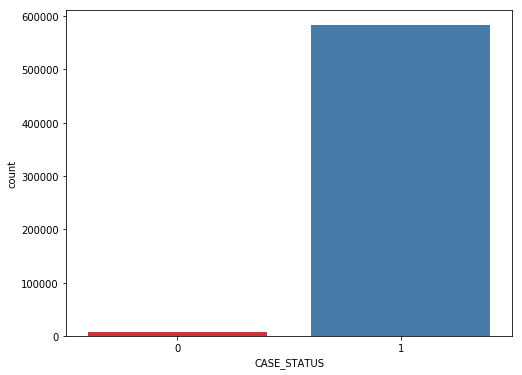

In [6]:
# output plot size
pylab.rcParams['figure.figsize'] = (8, 6)
# seaborn to plot collision severity count
sns.countplot(cleaned_data['CASE_STATUS'], label='Count', palette="Set1");

In [7]:
X = cleaned_data.iloc[:, 1:]
Y = cleaned_data.iloc[:, 0]

In [8]:
dtc = DecisionTreeClassifier(max_depth = 2)
dtc.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
dtc.predict_proba([[0, 1, 0, 0, 0, 1, 0, 0, 50000.00, 54000.00, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]])

array([[ 0.01213291,  0.98786709]])

In [10]:
dtc.predict_proba([[0, 1, 0, 0, 0, 1, 0, 0, 80000.00, 84000.00, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

array([[ 0.01213291,  0.98786709]])

In [11]:
# split the non-resampled data in test and training sets:

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [12]:
# print out the performance metrics:
dtc.fit(X_train, y_train)
prediction_unbalanced = dtc.predict(X_test)
print(classification_report(y_test, prediction_unbalanced))

             precision    recall  f1-score   support

          0       1.00      0.01      0.01      1864
          1       0.99      1.00      0.99    145592

avg / total       0.99      0.99      0.98    147456



The precision is great but the recall is really bad. 

### Under sampling the dominant class

In [13]:
clone_features = cleaned_data.iloc[:, 1:]
clone_target = cleaned_data.iloc[:, 0]

In [14]:
print(clone_features.shape)
print(clone_target.shape)

(589822, 22)
(589822,)


In [15]:
# for randomly undersampling the dominant class
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [69]:
# randomly undersample the dominant class, producing a 1:1 ratio:

us = RandomUnderSampler(ratio = 1, random_state = 1)
X_resampled, y_resampled = us.fit_sample(clone_features, clone_target)

# print count of the new distribution of class labels following undersampling:
print(sorted(Counter(y_resampled).items()))

[(0, 7353), (1, 7353)]


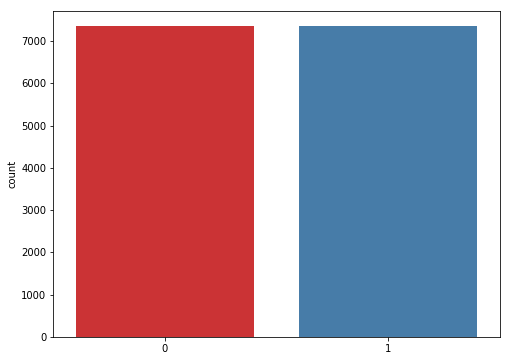

In [17]:
# should see class distribution now:
sns.countplot(y_resampled, label='Count', palette="Set1");

In [18]:
dtc.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
dtc.predict_proba([[0, 1, 0, 0, 0, 1, 0, 0, 50000.00, 54000.00, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]])

array([[ 0.57544757,  0.42455243]])

In [20]:
# split the non-resampled data in test and training sets:

X_train_resamp, X_test_resamp, y_train_resamp, y_test_resamp = train_test_split(X_resampled, y_resampled)

In [21]:
dtc.fit(X_train_resamp, y_train_resamp)
predictions = dtc.predict(X_test_resamp)
# print out the accuracy score:

print(round(accuracy_score(y_test_resamp,predictions), 3))

0.606


In [22]:
# print the confusion matrix of the predicted class labels:

print(confusion_matrix(y_test_resamp,predictions))

[[ 813 1012]
 [ 436 1416]]


In [23]:
# print out the performance metrics:

print(classification_report(y_test_resamp,predictions))

             precision    recall  f1-score   support

          0       0.65      0.45      0.53      1825
          1       0.58      0.76      0.66      1852

avg / total       0.62      0.61      0.60      3677



### Ensemble Learning - Bagging/Pasting, Random Forests, Boosting

### Bagging

In [24]:
from sklearn.ensemble import BaggingClassifier

Typically max samples is set to the size of the training set.

In [25]:
y_train_resamp.size

11029

In [26]:
bag_dct = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators =500,
    max_samples = 11029, bootstrap =True, oob_score = True)

bag_dct.fit(X_train_resamp, y_train_resamp)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=11029, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

**Out-of-Bag Evaluation**

In [27]:
print(round(bag_dct.oob_score_, 3))

0.691


Oob says the model should get about 0.71 accuracy on the test set. Let's see:

I can look at the class probability for each record:

In [28]:
bag_dct.oob_decision_function_

array([[ 0.49577745,  0.50422255],
       [ 0.34946237,  0.65053763],
       [ 0.01630435,  0.98369565],
       ..., 
       [ 0.16981132,  0.83018868],
       [ 0.05780347,  0.94219653],
       [ 0.3343696 ,  0.6656304 ]])

Notice that the first record quite difficult for the bagged model to classify (the probabilities are close), but some of the other ones are much easier. 

In [29]:
bag_preds = bag_dct.predict(X_test_resamp)

In [30]:
print(round(accuracy_score(y_test_resamp,bag_preds), 3))

0.701


In [31]:
# print out the performance metrics:

print(classification_report(y_test_resamp,bag_preds))

             precision    recall  f1-score   support

          0       0.70      0.69      0.70      1825
          1       0.70      0.71      0.71      1852

avg / total       0.70      0.70      0.70      3677



### Pasting

Without bootstrap resampling. Less bias, more variance. 

In [32]:
paste_dct = BaggingClassifier(
     DecisionTreeClassifier(), n_estimators =500,
     max_samples = 11029, bootstrap =False)

paste_dct.fit(X_train_resamp, y_train_resamp)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=11029, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [33]:
paste_preds = paste_dct.predict(X_test_resamp)

In [34]:
print(round(accuracy_score(y_test_resamp,paste_preds), 3))

0.663


In [35]:
print(classification_report(y_test_resamp,paste_preds))

             precision    recall  f1-score   support

          0       0.66      0.66      0.66      1825
          1       0.67      0.66      0.66      1852

avg / total       0.66      0.66      0.66      3677



### Random Forests 

Again, trades higher bias for lower variance.

**Balanced data** 

In [400]:
rnd_for = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=None)

In [356]:
rnd_for.fit(X_train_resamp, y_train_resamp)
rnd_for_preds = rnd_for.predict(X_test_resamp)

In [357]:
print(round(accuracy_score(y_test_resamp,rnd_for_preds), 3))

0.695


In [358]:
print(classification_report(y_test_resamp,rnd_for_preds))

             precision    recall  f1-score   support

          0       0.70      0.68      0.69      1825
          1       0.69      0.71      0.70      1852

avg / total       0.69      0.69      0.69      3677



Roughly equivalent bagged model with decision tree pasted in.

In [40]:
bag_rnd = BaggingClassifier(
    DecisionTreeClassifier(splitter="random"),
    n_estimators = 500, max_samples = 1.0, bootstrap = True,
)

In [41]:
bag_rnd.fit(X_train_resamp, y_train_resamp)
bag_rnd_preds = bag_rnd.predict(X_test_resamp)

In [42]:
print(round(accuracy_score(y_test_resamp,bag_rnd_preds), 3))

0.703


### Feature Importance

In [362]:
# Get numerical feature importances
importances = list(rnd_for.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cleaned_data.iloc[:, 1:].columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: PREVAILING_WAGE      Importance: 0.42
Variable: WAGE_RATE_OF_PAY_FROM Importance: 0.38
Variable: TOTAL_WORKERS        Importance: 0.02
Variable: NEW_EMPLOYMENT       Importance: 0.02
Variable: CONTINUED_EMPLOYMENT Importance: 0.02
Variable: AMENDED_PETITION     Importance: 0.02
Variable: H1B_DEPENDENT_N      Importance: 0.02
Variable: H1B_DEPENDENT_Y      Importance: 0.02
Variable: CHANGE_PREVIOUS_EMPLOYMENT Importance: 0.01
Variable: CHANGE_EMPLOYER      Importance: 0.01
Variable: PW_SOURCE_OES        Importance: 0.01
Variable: PW_SOURCE_Other      Importance: 0.01
Variable: WAGE_RATE_OF_PAY_TO_N Importance: 0.01
Variable: WAGE_RATE_OF_PAY_TO_Y Importance: 0.01
Variable: NEW_CONCURRENT_EMPLOYMENT Importance: 0.0
Variable: FULL_TIME_POSITION_N Importance: 0.0
Variable: FULL_TIME_POSITION_Y Importance: 0.0
Variable: PW_SOURCE_CBA        Importance: 0.0
Variable: PW_SOURCE_DBA        Importance: 0.0
Variable: PW_SOURCE_SCA        Importance: 0.0
Variable: WILLFUL_VIOLATOR_N   I

In [360]:
for feat, score in zip(cleaned_data.iloc[:, 1:].columns, rnd_for.feature_importances_):
    print(feat, score)

TOTAL_WORKERS 0.0242085924108
NEW_EMPLOYMENT 0.0249353965419
CONTINUED_EMPLOYMENT 0.0180496060894
CHANGE_PREVIOUS_EMPLOYMENT 0.0100588524276
NEW_CONCURRENT_EMPLOYMENT 0.00284790505582
CHANGE_EMPLOYER 0.0142805077676
AMENDED_PETITION 0.0179718953277
PREVAILING_WAGE 0.421888941455
WAGE_RATE_OF_PAY_FROM 0.376136083634
FULL_TIME_POSITION_N 0.00261840968226
FULL_TIME_POSITION_Y 0.00280138259604
PW_SOURCE_CBA 0.00127108464099
PW_SOURCE_DBA 0.000339086692881
PW_SOURCE_OES 0.0132482203191
PW_SOURCE_Other 0.0108749078364
PW_SOURCE_SCA 0.000258690345328
WAGE_RATE_OF_PAY_TO_N 0.00579576457332
WAGE_RATE_OF_PAY_TO_Y 0.00601288036569
H1B_DEPENDENT_N 0.0223025212076
H1B_DEPENDENT_Y 0.0232462391861
WILLFUL_VIOLATOR_N 0.000414577652685
WILLFUL_VIOLATOR_Y 0.0004384541916


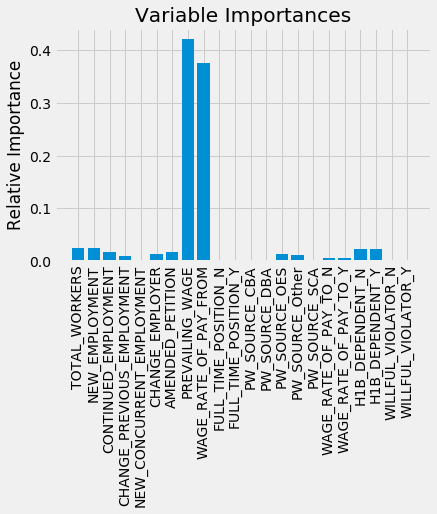

In [367]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, cleaned_data.iloc[:, 1:], rotation='vertical')
# Axis labels and title
plt.ylabel('Relative Importance'); plt.title('Variable Importances');

### Trim Unimportant Features?

Unimportant features:

* CHANGE_PREVIOUS_EMPLOYMENT
* NEW_CONCURRENT_EMPLOYMENT
* FULL_TIME_POSITION_N
* FULL_TIME_POSITION_Y
* PW_SOURCE_CBA
* PW_SOURCE_DBA
* PW_SOURCE_SCA 
* WAGE_RATE_OF_PAY_TO_N 
* WAGE_RATE_OF_PAY_TO_Y 
* WILLFUL_VIOLATOR_N
* WILLFUL_VIOLATOR_Y

In [368]:
noisey_cols = [ 'NEW_CONCURRENT_EMPLOYMENT',
                'FULL_TIME_POSITION_N',
                'FULL_TIME_POSITION_Y',
                'PW_SOURCE_CBA',
                'PW_SOURCE_DBA',
                'PW_SOURCE_SCA', 
                'WILLFUL_VIOLATOR_N',
                'WILLFUL_VIOLATOR_Y' ]


In [369]:
important_data  = cleaned_data.drop(noisey_cols, axis = 1)
important_data.columns

Index(['CASE_STATUS', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'CHANGE_EMPLOYER',
       'AMENDED_PETITION', 'PREVAILING_WAGE', 'WAGE_RATE_OF_PAY_FROM',
       'PW_SOURCE_OES', 'PW_SOURCE_Other', 'WAGE_RATE_OF_PAY_TO_N',
       'WAGE_RATE_OF_PAY_TO_Y', 'H1B_DEPENDENT_N', 'H1B_DEPENDENT_Y'],
      dtype='object')

In [370]:
important_features = important_data.iloc[:, 1:]
important_target = important_data.iloc[:, 0]
print(important_features.shape)
print(important_target.shape)

(589822, 14)
(589822,)


Stripped sample space in half column-wise. 

Randomly under-sample dominant class.

In [371]:
X_resampled_imp, y_resampled_imp = us.fit_sample(important_features, important_target)

# print count of the new distribution of class labels following undersampling:
print(sorted(Counter(y_resampled_imp).items()))

[(0, 7353), (1, 7353)]


In [372]:
# split the non-resampled data in test and training sets:
X_train_resamp_imp, X_test_resamp_imp, y_train_resamp_imp, y_test_resamp_imp = \
    train_test_split(X_resampled_imp, y_resampled_imp)

In [373]:
rnd_for.fit(X_train_resamp_imp, y_train_resamp_imp)
rnd_for_preds_imp = rnd_for.predict(X_test_resamp_imp)

In [374]:
print(round(accuracy_score(y_test_resamp_imp,rnd_for_preds_imp), 3))

0.695


In [375]:
print(classification_report(y_test_resamp_imp,rnd_for_preds_imp))

             precision    recall  f1-score   support

          0       0.69      0.70      0.69      1835
          1       0.70      0.69      0.70      1842

avg / total       0.69      0.69      0.69      3677



New feature importances

In [376]:
for feat, score in zip(important_data.iloc[:, 1:].columns, rnd_for.feature_importances_):
    print(feat, score)

TOTAL_WORKERS 0.0238682174148
NEW_EMPLOYMENT 0.0243930430717
CONTINUED_EMPLOYMENT 0.017338954502
CHANGE_PREVIOUS_EMPLOYMENT 0.00991412838277
CHANGE_EMPLOYER 0.0141667191687
AMENDED_PETITION 0.0178340152993
PREVAILING_WAGE 0.427052109325
WAGE_RATE_OF_PAY_FROM 0.379577532405
PW_SOURCE_OES 0.0148617269819
PW_SOURCE_Other 0.0118467916207
WAGE_RATE_OF_PAY_TO_N 0.00570188419731
WAGE_RATE_OF_PAY_TO_Y 0.00565649763388
H1B_DEPENDENT_N 0.0237675637492
H1B_DEPENDENT_Y 0.0240208162481


Strip more to test:

In [377]:
noisey_cols2 = ['CHANGE_EMPLOYER',
                'PW_SOURCE_OES',
                'PW_SOURCE_Other']

In [378]:
important_data2  = important_data.drop(noisey_cols2, axis = 1)
important_data2.columns

Index(['CASE_STATUS', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'AMENDED_PETITION', 'PREVAILING_WAGE', 'WAGE_RATE_OF_PAY_FROM',
       'WAGE_RATE_OF_PAY_TO_N', 'WAGE_RATE_OF_PAY_TO_Y', 'H1B_DEPENDENT_N',
       'H1B_DEPENDENT_Y'],
      dtype='object')

In [379]:
important_features2 = important_data2.iloc[:, 1:]
important_target2 = important_data2.iloc[:, 0]
print(important_features2.shape)
print(important_target2.shape)

(589822, 11)
(589822,)


In [380]:
X_resampled_imp2, y_resampled_imp2 = us.fit_sample(important_features2, important_target2)

# print count of the new distribution of class labels following undersampling:
print(sorted(Counter(y_resampled_imp2).items()))

[(0, 7353), (1, 7353)]


In [381]:
# split the non-resampled data in test and training sets:
X_train_resamp_imp2, X_test_resamp_imp2, y_train_resamp_imp2, y_test_resamp_imp2 = \
    train_test_split(X_resampled_imp2, y_resampled_imp2)

In [382]:
rnd_for.fit(X_train_resamp_imp2, y_train_resamp_imp2)
rnd_for_preds_imp2 = rnd_for.predict(X_test_resamp_imp2)

In [383]:
print(round(accuracy_score(y_test_resamp_imp2,rnd_for_preds_imp2), 3))

0.679


In [384]:
print(classification_report(y_test_resamp_imp2,rnd_for_preds_imp2))

             precision    recall  f1-score   support

          0       0.69      0.66      0.67      1855
          1       0.67      0.70      0.68      1822

avg / total       0.68      0.68      0.68      3677



In [61]:
for feat, score in zip(important_data2.iloc[:, 1:].columns, rnd_for.feature_importances_):
    print(feat, score)

TOTAL_WORKERS 0.0267956134897
NEW_EMPLOYMENT 0.0236870908973
CONTINUED_EMPLOYMENT 0.015917241765
AMENDED_PETITION 0.0174064896627
PREVAILING_WAGE 0.470693358284
WAGE_RATE_OF_PAY_FROM 0.399220575893
H1B_DEPENDENT_N 0.0239198178498
H1B_DEPENDENT_Y 0.0223598121585


Trying with only 2 features

In [394]:
important_data3 = cleaned_data[['CASE_STATUS', 'PREVAILING_WAGE', 'WAGE_RATE_OF_PAY_FROM']]

In [396]:
important_features3 = important_data3.iloc[:, 1:]
important_target3 = important_data3.iloc[:, 0]
print(important_features3.shape)
print(important_target3.shape)

(589822, 2)
(589822,)


In [398]:
X_resampled_imp3, y_resampled_imp3 = us.fit_sample(important_features3, important_target3)

# print count of the new distribution of class labels following undersampling:
print(sorted(Counter(y_resampled_imp3).items()))

[(0, 7353), (1, 7353)]


In [399]:
# split the non-resampled data in test and training sets:
X_train_resamp_imp3, X_test_resamp_imp3, y_train_resamp_imp3, y_test_resamp_imp3 = \
    train_test_split(X_resampled_imp3, y_resampled_imp3)

In [401]:
rnd_for.fit(X_train_resamp_imp3, y_train_resamp_imp3)
rnd_for_preds_imp3 = rnd_for.predict(X_test_resamp_imp3)

In [402]:
print(round(accuracy_score(y_test_resamp_imp2,rnd_for_preds_imp3), 3))

0.504


### Extremely Randomized Trees


Not only randomizing feature space to search for optimal split, also randomizing split threshold. All explained in my write-up. 

In [248]:
from sklearn.ensemble import ExtraTreesClassifier

In [252]:
extra_rand = ExtraTreesClassifier(
    n_estimators=200, max_leaf_nodes=None)

In [253]:
extra_rand.fit(X_train_resamp, y_train_resamp)
extra_rand_preds = extra_rand.predict(X_test_resamp)

In [254]:
print(round(accuracy_score(y_test_resamp,extra_rand_preds), 3))

0.693


On subset:

In [288]:
extra_rand.fit(X_train_resamp_imp, y_train_resamp_imp)
extra_rand_preds_imp = ada_b.predict(X_test_resamp_imp)
print(round(accuracy_score(y_test_resamp_imp,extra_rand_preds_imp), 3))

0.686


**Equivalent bagged model - with bootstrapped sampling and feature selection**

In [281]:
extra_rand_bag = BaggingClassifier(
    DecisionTreeClassifier(splitter="random"),
    n_estimators = 500, max_samples = 1.0, bootstrap = True, bootstrap_features= True,
)

In [282]:
extra_rand_bag.fit(X_train_resamp, y_train_resamp)
extra_rand_bag_preds = extra_rand_bag.predict(X_test_resamp)

In [283]:
print(round(accuracy_score(y_test_resamp,extra_rand_bag_preds), 3))

0.698


In [286]:
extra_rand_bag.fit(X_train_resamp_imp, y_train_resamp_imp)
extra_rand_bag_preds_imp = ada_b.predict(X_test_resamp_imp)
print(round(accuracy_score(y_test_resamp_imp,extra_rand_bag_preds_imp), 3))

0.686


### Boosting

**Ada Boost (Adaptive Boosting)**

In [73]:
from sklearn.ensemble import AdaBoostClassifier

Not quite using decision stumps (max dept = 2).

In [146]:
ada_b = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 2), n_estimators = 120,
    algorithm = "SAMME.R", learning_rate = 0.5)

In [147]:
ada_b.fit(X_train_resamp, y_train_resamp)
ada_b_preds = ada_b.predict(X_test_resamp)

In [148]:
print(round(accuracy_score(y_test_resamp,ada_b_preds), 3))

0.705


In [87]:
print(classification_report(y_test_resamp,ada_b_preds))

             precision    recall  f1-score   support

          0       0.68      0.65      0.67      1825
          1       0.67      0.70      0.69      1852

avg / total       0.68      0.68      0.68      3677



On subset data.

In [136]:
ada_b.fit(X_train_resamp_imp, y_train_resamp_imp)
ada_b_preds_imp = ada_b.predict(X_test_resamp_imp)
print(round(accuracy_score(y_test_resamp_imp,ada_b_preds_imp), 3))

0.686


**Gradient Boosting**

In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [243]:
GBcl = GradientBoostingClassifier(
        max_depth = 4, n_estimators = 150, learning_rate = 0.3)

In [244]:
GBcl.fit(X_train_resamp, y_train_resamp)
GBcl_preds = GBcl.predict(X_test_resamp)

In [245]:
print(round(accuracy_score(y_test_resamp,GBcl_preds), 3))

0.724


Definite improvement, note max depth here. 

On subset:

In [246]:
GBcl.fit(X_train_resamp_imp, y_train_resamp_imp)
GBcl_preds_imp = GBcl.predict(X_test_resamp_imp)

In [247]:
print(round(accuracy_score(y_test_resamp_imp,GBcl_preds_imp), 3))

0.705


Significant drop as I would expect. 

### Fine-Tune Parameters

### Starting with grid search

**Random Forest tuning**

In [289]:
from sklearn.model_selection import GridSearchCV

In [301]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8,10,12,14,16,18,20,22]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8,10,12,14,16,18,20,22]},
]

In [302]:
rnd_for = RandomForestClassifier()

In [303]:
grid_search = GridSearchCV(rnd_for, param_grid, cv=3, 
                          scoring = 'accuracy', n_jobs = 2)

In [304]:
grid_search.fit(X_train_resamp, y_train_resamp)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [305]:
grid_search.best_params_

{'max_features': 22, 'n_estimators': 30}

In [309]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=22, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [306]:
rnd_for = RandomForestClassifier(
    n_estimators=30, max_features =  22)

In [307]:
rnd_for.fit(X_train_resamp, y_train_resamp)
rnd_for_preds = rnd_for.predict(X_test_resamp)

In [320]:
print(round(accuracy_score(y_test_resamp,rnd_for_preds), 3))

0.701


**Round 2**

In [321]:
rnd_for = RandomForestClassifier()

In [331]:
param_grid = [
    {'n_estimators': [30, 70, 100, 150, 200, 250, 300]},
    {'bootstrap': [False], 'n_estimators': [30, 70, 100, 150, 200, 250, 300]},
]

In [332]:
grid_search = GridSearchCV(rnd_for, param_grid, cv=3, 
                          scoring = 'accuracy')

In [333]:
grid_search.fit(X_train_resamp, y_train_resamp)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [30, 70, 100, 150, 200, 250, 300]}, {'bootstrap': [False], 'n_estimators': [30, 70, 100, 150, 200, 250, 300]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [342]:
grid_search.best_params_

{'n_estimators': 250}

In [343]:
rnd_for = RandomForestClassifier(
    n_estimators=250)

In [344]:
rnd_for.fit(X_train_resamp, y_train_resamp)
rnd_for_preds = rnd_for.predict(X_test_resamp)

In [345]:
print(round(accuracy_score(y_test_resamp,rnd_for_preds), 3))

0.698


In [348]:
param_grid = [
    {'n_estimators': [200, 215, 230, 245, 250, 265, 280, 295]},
    {'bootstrap': [False], 'n_estimators': [200, 215, 230, 245, 250, 265, 280, 295]},
]

In [349]:
grid_search = GridSearchCV(rnd_for, param_grid, cv=3, 
                          scoring = 'accuracy')

In [350]:
grid_search.fit(X_train_resamp, y_train_resamp)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [200, 215, 230, 245, 250, 265, 280, 295]}, {'bootstrap': [False], 'n_estimators': [200, 215, 230, 245, 250, 265, 280, 295]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [351]:
grid_search.best_params_

{'n_estimators': 200}

In [403]:
rnd_for = RandomForestClassifier(
    n_estimators=200)

In [404]:
rnd_for.fit(X_train_resamp, y_train_resamp)
rnd_for_preds = rnd_for.predict(X_test_resamp)

In [405]:
print(round(accuracy_score(y_test_resamp,rnd_for_preds), 3))

0.694


In [438]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 2, verbose = 2)

In [439]:
# Fit the grid search to the data
grid_search.fit(X_train_resamp, y_train_resamp)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   32.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  5.4min
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:  9.6min
[Parallel(n_jobs=2)]: Done 864 out of 864 | elapsed: 12.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [440]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}


{'bootstrap': True,  
 'max_depth': 110,  
 'max_features': 3,  
 'min_samples_leaf': 3,  
 'min_samples_split': 10,  
 'n_estimators': 100}  


In [442]:
rnd_for = RandomForestClassifier(
    max_depth = 110,
    max_features = 3,
    min_samples_leaf = 3,
    min_samples_split = 10,
    n_estimators= 100)

In [443]:
rnd_for.fit(X_train_resamp, y_train_resamp)
rnd_for_preds = rnd_for.predict(X_test_resamp)

In [444]:
print(round(accuracy_score(y_test_resamp,rnd_for_preds), 3))

0.696


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
Model Performance
Average Error: 3.6561 degrees.
Accuracy = 93.83%.
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

### Randomized search

n_estimators = number of trees in the forest   
max_features = max number of features considered for splitting a node  
max_depth = max number of levels in each decision tree  
min_samples_split = min number of data points placed in a node before the node is split  
min_samples_leaf = min number of data points allowed in a leaf node  
bootstrap = method for sampling data points (with or without replacement)  

In [408]:
from sklearn.model_selection import RandomizedSearchCV

In [421]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 140, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 2)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 5, 6, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

{'n_estimators': [140, 346, 553, 760, 966, 1173, 1380, 1586, 1793, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 100], 'min_samples_split': [2, 4, 5, 6, 7, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [422]:
rand_for = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rand_for, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 2)
# Fit the random search model
rf_random.fit(X_train_resamp, y_train_resamp)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  8.1min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed: 17.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=2,
          param_distributions={'n_estimators': [140, 346, 553, 760, 966, 1173, 1380, 1586, 1793, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 100], 'min_samples_split': [2, 4, 5, 6, 7, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [ ]:
grid_search = GridSearchCV(rnd_for, param_grid, cv=3, 
                          scoring = 'accuracy')

In [423]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 966}

**First round:**

{'bootstrap': True,  
 'max_depth': None,  
 'max_features': 'auto',  
 'min_samples_leaf': 2,  
 'min_samples_split': 5,  
 'n_estimators': 760}  
 
 
 **Second round:**  
 
 {'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 966}
 

In [432]:
rand_for = RandomForestClassifier(bootstrap =True,
            max_depth = None,
            max_features = 'auto',
            min_samples_leaf = 2,
            min_samples_split = 4,
            n_estimators = 966)

In [433]:
rand_for.fit(X_train_resamp, y_train_resamp)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=966, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [434]:
rnd_for_preds = rnd_for.predict(X_test_resamp)

In [435]:
print(round(accuracy_score(y_test_resamp,rnd_for_preds), 3))

0.694


Compare to base model

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)
Model Performance
Average Error: 3.9199 degrees.
Accuracy = 93.36%.
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)
Model Performance
Average Error: 3.7152 degrees.
Accuracy = 93.73%.
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
Improvement of 0.40%.

#### Dimensionality Reduction + Random Patches / Random Subspaces